# Homework 1: Support Vector Machines

We classified digits and spam messages using the Soft-Margin Support
Vector Machine (SVM) algorithm. 


### Data 

Three data named test.mat, train.met, spam_data.mat are given. We imported these as dictionaries.

In [138]:
import scipy.io as sio
import numpy as np
test = sio.loadmat('./Desktop/Spring2016/CS189/hw1/data/digit-dataset/test.mat')
train = sio.loadmat('./Desktop/Spring2016/CS189/hw1/data/digit-dataset/train.mat')
spam_data = sio.loadmat('./Desktop/Spring2016/CS189/hw1/data/spam-dataset/spam_data.mat')

Observing the keys(content) in dictionaries, we extracted feature array and label array from both train data and test data. 

In [2]:
test

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Mon Jan 25 10:30:25 2016',
 '__version__': '1.0',
 'test_images': array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ..., 
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ..., 
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ..., 
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ..., 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ..., 
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0,

In [139]:
test_images = test['test_images']
test_img = np.transpose(test_images)
test_images.shape
test_img.shape

(28, 28, 10000)

In [4]:
train

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed Jan 21 01:23:55 2015',
 '__version__': '1.0',
 'train_images': array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ..., 
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ..., 
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ..., 
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ..., 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ..., 
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0,

In [140]:
train_images = train['train_images']
train_images.shape

(28, 28, 60000)

In [141]:
train_labels = train['train_labels']
train['train_labels'].shape

(60000, 1)

## Problem1



### Random sampling

To set aside 10,000 training images as a validation set, we imported numpy.random module to pick 10000 training images at random. 100, 200, 500, 1,000, 2,000, 5,000,
and 10,000 training examples were chosen by the same module. To guarantee the reproducibility, we fixed the seed where the random numbers are generated from.

In [142]:
import numpy.random as nr
nr.seed(0)

In [143]:
validation_index = nr.choice(60000, 10000, replace = False)
train_index = [w for w in range(60000) if w not in validation_index]

In [144]:
sub100 = nr.choice(train_index, size = 100, replace = False)
sub200 = nr.choice(train_index, size = 200, replace = False)
sub500 = nr.choice(train_index, size = 500, replace = False)
sub1000 = nr.choice(train_index, size = 1000, replace = False)
sub2000 = nr.choice(train_index, size = 2000, replace = False)
sub5000 = nr.choice(train_index, size = 5000, replace = False)
sub10000 = nr.choice(train_index, size = 10000, replace = False)

In [145]:
validation_img = train_images[...,validation_index]
train_img100 = train_images[...,sub100]
train_img200 = train_images[...,sub200]
train_img500 = train_images[..., sub500]
train_img1000 = train_images[..., sub1000]
train_img2000 = train_images[..., sub2000]
train_img5000 = train_images[..., sub5000]
train_img10000 = train_images[..., sub10000]

In [146]:
validation_lb = train_labels[validation_index,0]
train_lb100 = train_labels[sub100,0]
train_lb200 = train_labels[sub200,0]
train_lb500 = train_labels[sub500,0]
train_lb1000 = train_labels[sub1000,0]
train_lb2000 = train_labels[sub2000,0]
train_lb5000 = train_labels[sub5000,0]
train_lb10000 = train_labels[sub10000,0]

In [147]:
train_img100.shape

(28, 28, 100)

In [148]:
train_lb100.shape

(100,)

All the arrays with name starting with 'train_img...' defined above are three-dimensional $28*28*100$ array, which means that each data point is being represented as a $28*28$ two-dimensional array. But our classification method SVM is designed to be trained by 1-dimensional feature vectors, not 2-dimensional arrays. Thus we implemented a function named 'convert_to_feature' that transforms the two-dimensional array into a feature vector without losing any informative numbers. 

In [149]:
def convert_to_feature(thd_array, n):
    x = [thd_array[..., i] for i in np.arange(n)]
    y = [np.ndarray.flatten(v) for v in x]
    return np.asarray(y)


In [150]:
validation_feature = convert_to_feature(validation_img, 10000)
train_feature100 = convert_to_feature(train_img100, 100)
train_feature200 = convert_to_feature(train_img200, 200)
train_feature500 = convert_to_feature(train_img500, 500)
train_feature1000 = convert_to_feature(train_img1000, 1000)
train_feature2000 = convert_to_feature(train_img2000, 2000)
train_feature5000 = convert_to_feature(train_img5000, 5000)
train_feature10000 = convert_to_feature(train_img10000, 10000)

### SVM(Support Vector Machine)

We trained the linear SVM using different number of training data that were chosen above. Using each trained classifier, we made predictions of digit of validation data based on their feature vectors and compared resulting predicted labels with their true digits, to evaluate the classification accuracy. Here, we focused on classification accuracy as a measure of the error rate. Note that the error rate is the proportion of misclassified data, a number in-between 0 and 1.

In [151]:
from sklearn import svm

In [152]:
def count_misclassification (pred, real):
    n = len(pred)
    x = [i for i in range(n) if pred[i] != real[i]]
    return len(x)/n

In [153]:
linear_svc100 = svm.SVC(kernel='linear')
linear_svc100.fit(train_feature100, train_lb100) 
pred_100 = linear_svc100.predict(validation_feature)
msclssfc100 = count_misclassification(pred_100, validation_lb)

In [154]:
linear_svc200 = svm.SVC(kernel = 'linear')
linear_svc200.fit(train_feature200, train_lb200)
pred_200 = linear_svc200.predict(validation_feature)
msclssfc200 = count_misclassification(pred_200, validation_lb)

In [155]:
linear_svc500 = svm.SVC(kernel = 'linear')
linear_svc500.fit(train_feature500, train_lb500)
pred_500 = linear_svc500.predict(validation_feature)
msclssfc500 = count_misclassification(pred_500, validation_lb)

In [156]:
linear_svc1000 = svm.SVC(kernel = 'linear')
linear_svc1000.fit(train_feature1000, train_lb1000)
pred_1000 = linear_svc1000.predict(validation_feature)
msclssfc1000 = count_misclassification(pred_1000, validation_lb)

In [157]:
linear_svc2000 = svm.SVC(kernel = 'linear')
linear_svc2000.fit(train_feature2000, train_lb2000)
pred_2000 = linear_svc2000.predict(validation_feature)
msclssfc2000 = count_misclassification(pred_2000, validation_lb)

In [158]:
linear_svc5000 = svm.SVC(kernel = 'linear')
linear_svc5000.fit(train_feature5000, train_lb5000)
pred_5000 = linear_svc5000.predict(validation_feature)
msclssfc5000 = count_misclassification(pred_5000, validation_lb)

In [159]:
linear_svc10000 = svm.SVC(kernel = 'linear')
linear_svc10000.fit(train_feature10000, train_lb10000)
pred_10000 = linear_svc10000.predict(validation_feature)
msclssfc10000 = count_misclassification(pred_10000, validation_lb)

In [161]:
misclassification_rate = [msclssfc100, msclssfc200, msclssfc500,
                          msclssfc1000,msclssfc2000,msclssfc5000,msclssfc10000]
misclassification_rate

[0.3315, 0.2422, 0.1891, 0.1696, 0.1428, 0.1303, 0.1341]

In [163]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

Following table and bar chart show
the error rate on the validation set versus the number of training examples
that we used to train classifier. This displays a strong trend that the error rate decreases as the number of training examples increases at large. But this tendency may not be always followed as we can see from the two error rates of classifiers that were trained with 5000, 10000 training examples. Although former classifier was trained with less number of training examples, it results in the lower error rate. We guessed that the number of training examples reaches at a certain number, which depends on data, the error rate stays about the same.

|Number of Training data| The Error Rate|
|-----------------------|---------------|
|100                    |0.3315         |
|200                    |0.2422         |
|500                    |0.1891         |
|1000                   |0.1696         |
|2000                   |0.1428         |
|5000                   |0.1303         |
|10000                  |0.1341         |

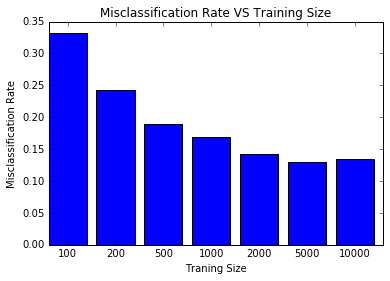

In [164]:


fig = plt.figure()
axes = fig.add_subplot(111)
xpos = np.arange(len(misclassification_rate))
xticklb = ['100','200','500','1000','2000','5000','10000'] 


axes.bar(xpos, misclassification_rate)
axes.set_title('Misclassification Rate VS Training Size')
axes.set_xlabel('Traning Size')
axes.set_ylabel('Misclassification Rate')
plt.xticks([w + 0.4 for w in xpos], xticklb)

plt.show()

## Problem 2

### Confusion matrix
In a multi-class classification setting, a confusion matrix is often used to report the performance of
algorithm. Briefly, a confusion matrix is a matrix where rows correspond to the actual class and columns indicate
the predicted class. Numeric confusion matrice is presented for each experiment in Problem 1. We also plotted bluescale confusion matrices to visualize better.

In [165]:
from sklearn.metrics import confusion_matrix


In [166]:
def plot_confusion_matrix( cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    pos = [0,1,2,3,4,5,6,7,8,9]
    ticklb = ['0','1','2','3','4','5','6','7','8','9']
    
    plt.xticks(pos, ticklb)
    plt.yticks(pos, ticklb)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
# Compute confusion matrix
cm100 = confusion_matrix(validation_lb, pred_100)
cm200 = confusion_matrix(validation_lb, pred_200)
cm500 = confusion_matrix(validation_lb, pred_500)
cm1000 = confusion_matrix(validation_lb, pred_1000)
cm2000 = confusion_matrix(validation_lb, pred_2000)
cm5000 = confusion_matrix(validation_lb, pred_5000)
cm10000 = confusion_matrix(validation_lb, pred_10000)
np.set_printoptions(precision=2)

Confusion matrix, with 100 training examples
[[ 769    0    2    8    0  144   14    5   10    9]
 [   0 1084    6    2    2    9    2    4   13    6]
 [  69   69  642   31   13   68   64   25   24   14]
 [   7   45   29  589   13  264    5   14   51    8]
 [  20   26    3    1  632   73    7    5    0  184]
 [   5   26    4   54   32  718   11   13   29   44]
 [  27   61   18   11   68  164  616    0   26   29]
 [   6   97   14   17   34   80    0  715   12   53]
 [  17   90   13  119   19  132   14    4  443   53]
 [  19   49    6   31  232   99    0  103   12  477]]



Confusion matrix, with 200 training examples
[[ 848    0   26   22    3   21   17    7    8    9]
 [   1 1026   13   17    5    6    5   42   13    0]
 [  24   17  807   23   17    1   35   40   47    8]
 [  13   18   49  653    4   83    4   44  124   33]
 [   4   25   22    2  676    6   71    7   11  127]
 [  19   47   24  170   17  593   29    8   15   14]
 [  22    9   33   15    3   17  904    1   15    1]
 [   

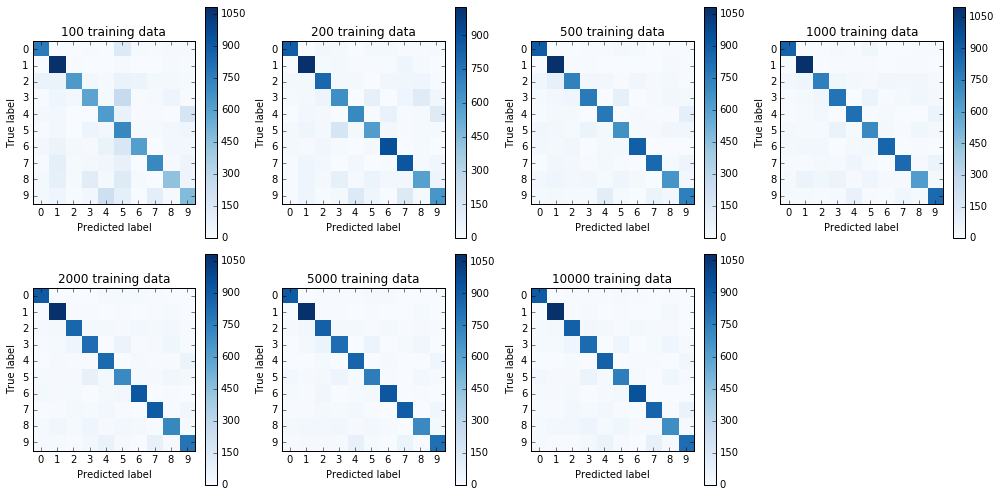

In [171]:
print('Confusion matrix, with 100 training examples')
print(cm100)
print('\n\n')
print('Confusion matrix, with 200 training examples')
print(cm200)
print('\n\n')
print('Confusion matrix, with 500 training examples')
print(cm500)
print('\n\n')
print('Confusion matrix, with 1000 training examples')
print(cm1000)
print('\n\n')
print('Confusion matrix, with 2000 training examples')
print(cm2000)
print('\n\n')
print('Confusion matrix, with 5000 training examples')
print(cm5000)
print('\n\n')
print('Confusion matrix, with 10000 training examples')
print(cm1000)



fig = plt.figure(figsize =(14,7))
fig.add_subplot(2,4,1)
plot_confusion_matrix(cm100, title = '100 training data')
fig.add_subplot(2,4,2)
plot_confusion_matrix(cm200, title = '200 training data')
fig.add_subplot(2,4,3)
plot_confusion_matrix(cm500, title = '500 training data')
fig.add_subplot(2,4,4)
plot_confusion_matrix(cm1000, title = '1000 training data')
fig.add_subplot(2,4,5)
plot_confusion_matrix(cm2000, title = '2000 training data')
fig.add_subplot(2,4,6)
plot_confusion_matrix(cm5000, title = '5000 training data')
fig.add_subplot(2,4,7)
plot_confusion_matrix(cm10000, title = '10000 training data')

plt.show()



## Problem 3

### 10-fold Cross-Validation
A common practice while performing machine learning experiments is to perform cross-validation to select model parameters. We used k-fold cross-validation3 to determine a good value for the regularization parameter C in the soft-margin SVM algorithm. While trying to choose a model parameter, cross-validation is repeated for several different parameter values. The parameter value with the highest cross-validation accuracy is used when training the final model on the entire training set.

We implemented the function named 'cross_validation' which takes feature vectors, labels, k, a parameter value c and returns the average misclassification rates of performing k-fold cross-validation on soft-margin SVM classifiers with the regularization parameter c.

In [172]:
def cross_validation(feature, label, k, c):
    n = len(label)
    j = n // k
    sum_misc = 0
    for i in range(k):
    
        a = feature[0: i * j,]
        b = feature[(i+1)* j:n,]
        train_feature = np.concatenate((a,b))
        
        d = label[0: i * j]
        e = label[(i+1)* j:n]
        train_label = np.concatenate((d,e))
        
        test_feature = feature[i * j:(i+1) * j, ]
        test_label = label[i * j:(i+1) * j]

        linearsvc = svm.SVC(kernel = 'linear', C = c)
        linearsvc.fit(train_feature, train_label)
        pred = linearsvc.predict(test_feature)
        mis_rate = count_misclassification(pred, test_label)
        sum_misc = sum_misc + mis_rate
    return sum_misc/k
        

In order to find the best regularization parameter C, cross-validation was repeated for several different parameter values: 1.0, 0.1, 0.01, 0.000001, 0.001,0.00000001,0.0000000001, 0.000002, 0.0000009,0.0000008, 0.0000011, 0.00000085, 0.00000086, 0.00000084, 0.000000855, 0.000000845.

We performed cross-validation first on several non-negative exponents of 10 for the parameter value to get the feel of the possible location for the optimal parameter value and observed that 0.000001 gives the highest cross-validation accuracy among them. Then we tried several numbers close to 0.000001 for the parameter value: 0.0000009,0.0000008, 0.0000011, 0.00000085, 0.00000086, 0.00000084, 0.000000855, 0.000000845. We speculated that 0.00000085 is the optimal value for the regularization parameter that has the highest cross-validation accuracy during our experiment.  

Here we presented both table and dot plot of the average misclassification rate versus the value for the regularization parameter. Note that the logarithmic scale was applied to the parameter value in the bar plot.

|Cross-Validation Accuracy| Parameter Value   |
|-------------------------|-------------------|
| 0.00000001              |  0.152            |
| 0.0000000001            |  0.8779           |
| 0.0000008               |0.0986             |
| 0.00000084              |0.09799999999999999|
| 0.000000845             |0.09799999999999999|
| 0.00000085              |0.09789999999999999|
| 0.000000855             |0.09799999999999999| 
| 0.00000086              |0.09799999999999999|
| 0.0000009               |0.09849999999999999|
| 0.000001                |0.09929999999999999|
| 0.0000011               |0.10049999999999999|
| 0.000002                |0.10179999999999997|
| 0.001                   |  0.1339           |
| 0.01                    |  0.1339           |
| 0.1                     |  0.1339           |
| 1.0                     |  0.1339           |

In [173]:
cross_validation(train_feature10000, train_lb10000, 10, 1.0)

0.1339

In [174]:
cross_validation(train_feature10000, train_lb10000, 10, 0.1)

0.1339

In [175]:
cross_validation(train_feature10000, train_lb10000, 10, 0.01)

0.1339

In [176]:
cross_validation(train_feature10000, train_lb10000, 10, 0.000001)

0.09929999999999999

In [124]:
cross_validation(train_feature10000, train_lb10000, 10, 0.001)

0.1339

In [125]:
cross_validation(train_feature10000, train_lb10000, 10, 0.00000001)

0.152

In [127]:
cross_validation(train_feature10000, train_lb10000, 10, 0.0000000001)

0.8779

In [128]:
cross_validation(train_feature10000, train_lb10000, 10, 0.000002)

0.10179999999999997

In [129]:
cross_validation(train_feature10000, train_lb10000, 10, 0.0000009)

0.09849999999999999

In [130]:
cross_validation(train_feature10000, train_lb10000, 10, 0.0000008)

0.0986

In [131]:
cross_validation(train_feature10000, train_lb10000, 10, 0.0000011)

0.10049999999999999

In [132]:
cross_validation(train_feature10000, train_lb10000, 10, 0.00000085)

0.09789999999999999

In [133]:
cross_validation(train_feature10000, train_lb10000, 10, 0.00000086)

0.09799999999999999

In [134]:
cross_validation(train_feature10000, train_lb10000, 10, 0.00000084)

0.09799999999999999

In [135]:
cross_validation(train_feature10000, train_lb10000, 10, 0.000000855)

0.09799999999999999

In [136]:
cross_validation(train_feature10000, train_lb10000, 10, 0.000000845)

0.09799999999999999

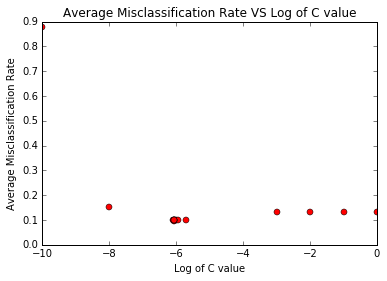

In [183]:
import math

fig = plt.figure()
axes = fig.add_subplot(111)
cvals = [1.0, 0.1, 0.01, 0.000001, 0.001,0.00000001,0.0000000001,0.000002,0.0000009,0.0000008,0.0000011
        ,0.00000085, 0.00000086,  0.00000084, 0.000000855, 0.000000845]
xpos = [math.log(w)/math.log(10) for w in cvals]
avg_misclssfc = [0.1339, 0.1339, 0.1339, 0.09929999999999999, 0.1339, 0.152, 0.8779, 0.10179999999999997
                 ,0.09849999999999999, 0.0986, 0.10049999999999999, 0.09789999999999999, 0.09799999999999999,
                0.09799999999999999, 0.09799999999999999, 0.09799999999999999]
axes.plot(xpos, avg_misclssfc, 'ro')
axes.set_title('Average Misclassification Rate VS Log of C value')
axes.set_xlabel('Log of C value')
axes.set_ylabel('Average Misclassification Rate')


plt.show()

We drew a separate plot of average misclassification rate versus different C values in [0.0000008 and 0.0000009] to magnify the minute difference between misclassification rates  in close proximity to each other. 0.00000085 was the optimal value for regularization parameter that reached the highest classification accuracy.

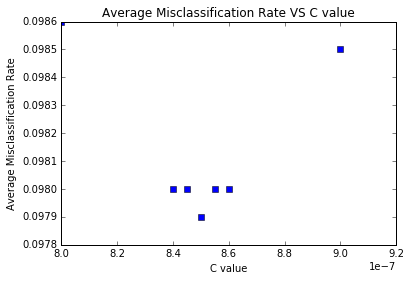

In [184]:
fig1 = plt.figure()
axes1 = fig1.add_subplot(111)
cvals1 = [0.0000009,0.0000008,0.00000085, 0.00000086,  0.00000084, 0.000000855, 0.000000845]

avg_misclssfc1 = [0.09849999999999999, 0.0986, 0.09789999999999999, 0.09799999999999999,
                0.09799999999999999, 0.09799999999999999, 0.09799999999999999]
axes1.plot(cvals1, avg_misclssfc1, 'bs')
axes1.set_title('Average Misclassification Rate VS C value')
axes1.set_xlabel('C value')
axes1.set_ylabel('Average Misclassification Rate')


plt.show()


### Train entire training set with the optimal value for regularization paramter C
We trained soft-margin SVM with fixed parameter of value 0.00000085 on 50000 training feautre, excluding the validation feature. After being fitted, the model then was used to predict new digits of test data.

### Validation error rate & Kaggle score

We achieved Kaggle score of 0.92820. Our model matched 0.9181 of validation data with the correct label. 

In [29]:
linearsvc = svm.SVC(kernel = 'linear', C = 0.00000085)
train_feature = convert_to_feature(train_images[...,train_index], 50000)
train_lb = train_labels[train_index, 0]
linearsvc.fit(train_feature, train_lb)

test_feature = convert_to_feature(test_img,10000)
pred_test = linearsvc.predict(test_feature)

In [78]:
pred_valid = linearsvc.predict(validation_feature)
count_misclassification(pred_valid, validation_lb)

0.0819

In [30]:
pred_txt = np.asarray([[i+1, pred_test[i]] for i in np.arange(10000)])


In [31]:
np.savetxt('pred_test1.csv',pred_txt,fmt = '%1.u' ,  delimiter = ',', header = 'Id,Category',comments='')

## Problem 4

### SPAM/HAM Classification

We classified real spam messages, building a classifier that, given the raw text of an email, classifies it as spam/ham (not-spam). The raw text of real emails and some extracted features were provided.

### 10-fold Cross-Validation
We used cross-validation implementation from above to train a linear SVM for the spam dataset. Before performing cross-validation, we randomly shuffled traing examples to get more fair outcome. 

In order to find the optimal value for the regularization parameter, we performed 10-fold cross-validation over different values. After comparing the classification accuracy of values 1 and 10, we decided to test with values that is greater than 10. Out of the values that we've tried, we met with the best classification accuracy when we trained soft-margin SVM with parameter of value 13.

### Validation error rate & Kaggle score 
The model trained with the optimal parameter value obtained 0.21160409556313994 as the validation error rate. I could not submit the predicted label to kaggle due to daily submission allowance. Among the predicted labels that I have submitted to kaggle, the model trained with the parameter value 15 achieved validation error of 0.21160409556313994 and the highest kaggle score of 0.7373. But it is highly probable that the newly trained model with parameter value 13 may slightly improve the kaggle score.

In [81]:
spam_data

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Jan 20 22:50:03 2015',
 '__version__': '1.0',
 'test_data': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  3.,  0.,  0.]]),
 'training_data': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  1., ...,  4.,  0.,  0.],
        [ 0.,  0.,  0., ...,  2.,  0.,  0.]]),
 'training_labels': array([[1, 1, 1, ..., 0, 0, 0]])}

In [93]:
arr = np.arange(5172)
nr.shuffle(arr)

In [113]:
sptrain_data = spam_data['training_data'][arr, ][0:4000,]
sptrain_lb = spam_data['training_labels'][0,][arr][0:4000]
spvalidation_data = spam_data['training_data'][arr,][4000:, ] 
spvalidation_lb = spam_data['training_labels'][0,][arr][4000:]
sptest_data = spam_data['test_data']


In [114]:
print(sptrain_data.shape)
print(sptrain_lb.shape)
print(sptest_data.shape)
arr[0]

(4000, 32)
(4000,)
(5857, 32)


2045

In [116]:
cross_validation(sptrain_data, sptrain_lb, 10, 10)

0.19350000000000003

In [117]:
cross_validation(sptrain_data, sptrain_lb, 10, 1)

0.19424999999999998

In [134]:
cross_validation(sptrain_data, sptrain_lb, 10, 0.1)

0.1985

In [103]:
cross_validation(sptrain_data, sptrain_lb, 10, 30)

0.19690522243713732

In [119]:
cross_validation(sptrain_data, sptrain_lb, 10, 20)

0.194

In [122]:
cross_validation(sptrain_data, sptrain_lb, 10, 15)

0.1935

In [123]:
cross_validation(sptrain_data, sptrain_lb, 10, 13)

0.193

In [124]:
cross_validation(sptrain_data, sptrain_lb, 10, 12)

0.19324999999999998

In [125]:
cross_validation(sptrain_data, sptrain_lb, 10, 14)

0.19375

In [120]:
cross_validation(sptrain_data, sptrain_lb, 10, 0.01)

0.2165

In [121]:
cross_validation(sptrain_data, sptrain_lb, 10, 0.0001)

0.275

In [135]:
splinearsvc = svm.SVC(kernel = 'linear', C = 13)
splinearsvc.fit(shf_sptrain_data, shf_sptrain_lb)
sppred = splinearsvc.predict(sptest_data)
spvalidpred = splinearsvc.predict(spvalidation_data)
count_misclassification(spvalidpred, spvalidation_lb)

In [137]:
splinearsvc = svm.SVC(kernel = 'linear', C = 15)
splinearsvc.fit(shf_sptrain_data, shf_sptrain_lb)
sppred = splinearsvc.predict(sptest_data)
spvalidpred = splinearsvc.predict(spvalidation_data)
count_misclassification(spvalidpred, spvalidation_lb)

0.21160409556313994

In [187]:
sppred_txt = np.asarray([[i+1, sppred[i]] for i in np.arange(5857)])
np.savetxt('sppred_test.csv',sppred_txt,fmt = '%1.u' ,  delimiter = ',', header = 'Id,Category',comments='')

We plotted average misclassification rate versus the parameter value.

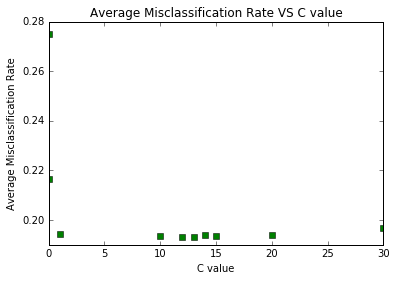

In [186]:
spfig = plt.figure()
spaxes = spfig.add_subplot(111)
spcvals = [10, 1, 30, 20, 15, 13, 12, 14, 0.01, 0.0001]

spavg_misclssfc = [0.19350000000000003, 0.19424999999999998,0.19690522243713732, 0.194
                 , 0.1935, 0.193,0.19324999999999998, 0.19375, 0.2165, 0.275]


spaxes.plot(spcvals, spavg_misclssfc, 'gs')
spaxes.set_title('Average Misclassification Rate VS C value')
spaxes.set_xlabel('C value')
spaxes.set_ylabel('Average Misclassification Rate')


